In [ ]:
1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# 1) Delivery_time -> Predict delivery time using sorting time

In [4]:
import pandas as pd 
import numpy as np

In [5]:
ls

 Volume in drive C is OS
 Volume Serial Number is 3A3B-B1C3

 Directory of C:\Users\Dell\EXCELR\Assignment\linear regression

04-11-2022  17:57    <DIR>          .
02-11-2022  19:26    <DIR>          ..
04-11-2022  16:51    <DIR>          .ipynb_checkpoints
01-11-2022  17:03               218 delivery_time.csv
04-11-2022  17:57            91,587 linear regresion assignment_1.ipynb
04-11-2022  17:57           118,749 linear regression assignment_2.ipynb
01-11-2022  17:03               318 Problem_statements.txt
01-11-2022  17:03               454 Salary_Data.csv
               5 File(s)        211,326 bytes
               3 Dir(s)  196,795,260,928 bytes free


In [6]:
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Performing EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

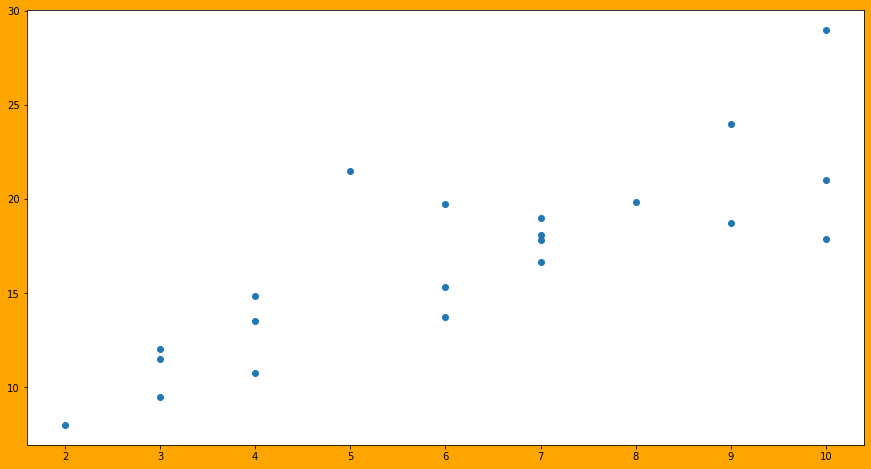

In [10]:
plt.figure(figsize=(15,8),facecolor='orange')
plt.scatter(df['Sorting Time'],df['Delivery Time'])

<AxesSubplot:>

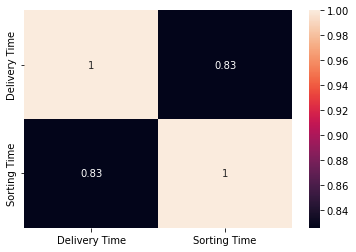

In [11]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

# creating model with sklearn

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm=LinearRegression()

In [14]:
x=df['Sorting Time'].values.reshape(-1,1)
y=df['Delivery Time'].values.reshape(-1,1)

lm.fit(x,y)

LinearRegression()

In [15]:
print(lm.coef_) #alpha
print(lm.intercept_) #beta

[[1.6490199]]
[6.58273397]


In [16]:
lm.predict(x)

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

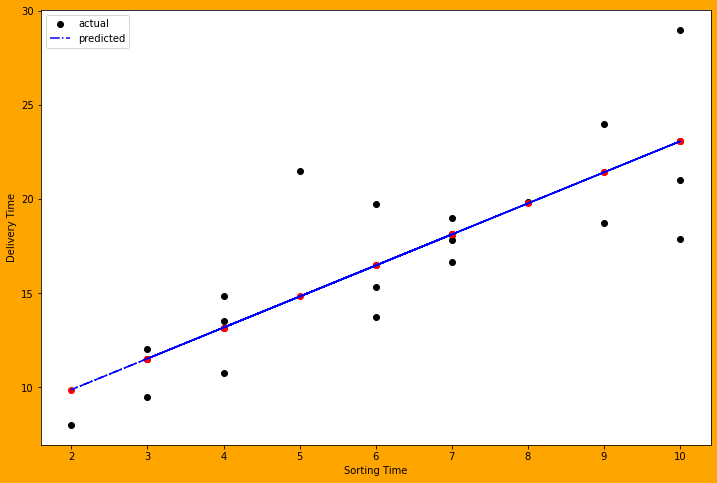

In [17]:
plt.figure(figsize=(12,8),facecolor='orange')
plt.scatter(df['Sorting Time'],df['Delivery Time'],color='black',label='actual')
plt.plot(df['Sorting Time'],lm.predict(x),color='b',linestyle='-.',label='predicted')
plt.scatter(df['Sorting Time'],lm.predict(x),color='r')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.legend(loc='best')
plt.show()

In [18]:
from sklearn.metrics import r2_score

In [19]:
pred_train_lm =lm.predict(x)
r2_score(df["Delivery Time"],pred_train_lm)

0.6822714748417231

# Creating model with statsmodels

In [20]:
import statsmodels.formula.api as smf

In [21]:
df_1=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df_1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [22]:
model_1=smf.ols('delivery_time ~ sorting_time',data=df_1).fit()

In [23]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        17:58:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model_2 = smf.ols('delivery_time ~ np.log(sorting_time)',data=df_1).fit()
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           2.64e-06
Time:                        17:58:35   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model_3 = smf.ols('np.log(delivery_time)~(sorting_time)',data=df_1).fit()
model_3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Fri, 04 Nov 2022   Prob (F-statistic):           1.59e-06
Time:                           17:58:35   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
df_1["sorting_time_Sq"] = df_1.sorting_time**2
model_4 = smf.ols("np.log(delivery_time)~sorting_time+sorting_time_Sq",data=df_1).fit()
# model_quad.params
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Fri, 04 Nov 2022   Prob (F-statistic):           2.20e-06
Time:                           17:58:35   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time        0.2659      0.080      3.315      0.004       0.097       0.434
sorting_time_Sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model_4.rsquared   # Among the four models heighest r_squared values is of model_4 therefore model_4 is final model

0.7648666342953732